<a href="https://colab.research.google.com/github/akimi-yano/climbing-footwork-classification/blob/main/Climbing_Footwork_Classification_Data_Wrangling%26Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

In this Google Colab file, I permormed Data Wrangling and Exploration on the small set of sample images I collected on the internet. It is the process of preparing raw data for machine learning training.






# Import Libraries

In [1]:
# Google drive
from google.colab import drive

# Python libraries
import random

# Basic libraries for data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# System libraries
import os
from pathlib import Path

# Image Processing
from PIL import Image, ImageChops, ImageEnhance
import cv2


In [2]:
drive.mount('/content/drive')
input_dir = '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset'
val = os.listdir(input_dir)
print(val)

Mounted at /content/drive
['heel_hook', 'toe_hook', 'others']


# Helper Functions

In [3]:
def check_image_format(input_dir):
  for dirpath, dirnames, filenames in os.walk(input_dir):
    for i, filename in enumerate(filenames):
      filepath = os.path.join(dirpath, filename)
      try:
          with Image.open(filepath) as img:

            print(f"Index: {i} - File Path: {filepath} - Actual Format: {img.format}") # The format should be PNG after Format Adjusting.
      except Exception as e:
          print(f"Error: {e}")

# Load Data

In [4]:
for dirpath, dirnames, filenames in os.walk(input_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset'.
There are 0 directories and 10 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook'.
There are 0 directories and 10 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/toe_hook'.
There are 0 directories and 10 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/others'.


In [5]:
check_image_format(input_dir)

Index: 0 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img5.png - Actual Format: WEBP
Index: 1 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img2.png - Actual Format: JPEG
Index: 2 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img3.png - Actual Format: WEBP
Index: 3 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img1.png - Actual Format: WEBP
Index: 4 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img6.png - Actual Format: JPEG
Index: 5 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img10.png - Actual Format: WEBP
Index: 6 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img4.png - Actual Format: JPEG
Index: 7 - F

# Adjust the Format to be PNG

Since the images I collected from the internet had different file formats, I converted the image files to have PNG format.


In [6]:
formatted__output_dir = '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset'

# Create output directory if it doesn't exist
if not os.path.exists(formatted__output_dir):
    os.makedirs(formatted__output_dir)
    print(f"Directory '{formatted__output_dir}' created.")
else:
    print(f"Directory '{formatted__output_dir}' already exists.")

# Traverse subdirectories and process files
for dir_name in os.listdir(input_dir):
    sub_dir_path = os.path.join(input_dir, dir_name)
    if os.path.isdir(sub_dir_path):
        for file_name in os.listdir(sub_dir_path):
            if file_name.endswith(('.WEBP', '.JPEG', '.webp', '.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                file_path = os.path.join(sub_dir_path, file_name)  # Full path to the file
                print(f"Processing: {file_path}")
                try:
                    with Image.open(file_path) as img:
                        # Save the image as PNG
                        output_sub_dir = os.path.join(formatted__output_dir, dir_name)
                        os.makedirs(output_sub_dir, exist_ok=True)  # Create subdirectory if it doesn't exist
                        output_path = os.path.join(output_sub_dir, os.path.splitext(file_name)[0] + ".png")
                        img.save(output_path, format="PNG")
                        print(f"Saved as PNG: {output_path}")
                except Exception as e:
                    print(f"Failed to process {file_name}: {e}")

Directory '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset' already exists.
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img5.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img5.png
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img2.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img2.png
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img3.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img3.png
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset/heel_hook/img1.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/hee

In [7]:
check_image_format(formatted__output_dir)

Index: 0 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img5.png - Actual Format: PNG
Index: 1 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img2.png - Actual Format: PNG
Index: 2 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img1.png - Actual Format: PNG
Index: 3 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img3.png - Actual Format: PNG
Index: 4 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img6.png - Actual Format: PNG
Index: 5 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img4.png - Actual Format: PNG
Index: 6 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_mini_dataset/heel_hook/img10.pn

# Place the Dataset into Dataframe

In [8]:
image_dir = Path(formatted__output_dir)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
print("Filepath length: ", len(filepaths))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
print("Labels length: ", len(labels))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

Filepath length:  30
Labels length:  30


In [9]:
image_df

,Filepath,Label
0,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
1,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
2,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
3,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
4,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
5,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
6,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
7,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
8,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
9,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook


In [10]:
image_df['Label'].value_counts()

,count
Label,
heel_hook,10
toe_hook,10
others,10


# Visualize Images from the Dataset

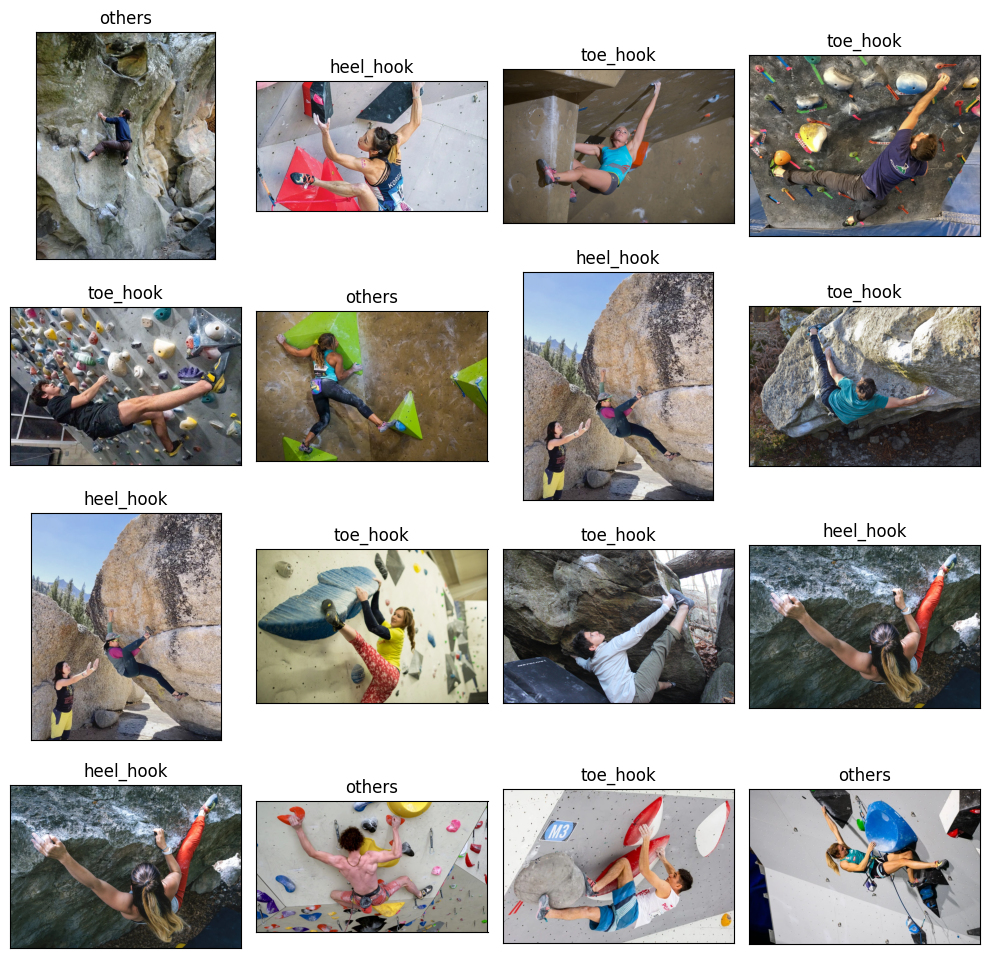

In [22]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
  ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()

# Error Level Analysis (ELA)

Creating a visualization of Error Level Analysis (ELA) for a random image selected from the dataset's heel_hook class.

Here are the purposes of this analysis:

1.   Identify image tampering or anomalies: ELA highlights subtle changes in compression artifacts, which can reveal areas of the image that have been altered or manipulated.
2.   Understand compression effects: By varying JPEG quality, you can observe how artifacts change at different compression levels.

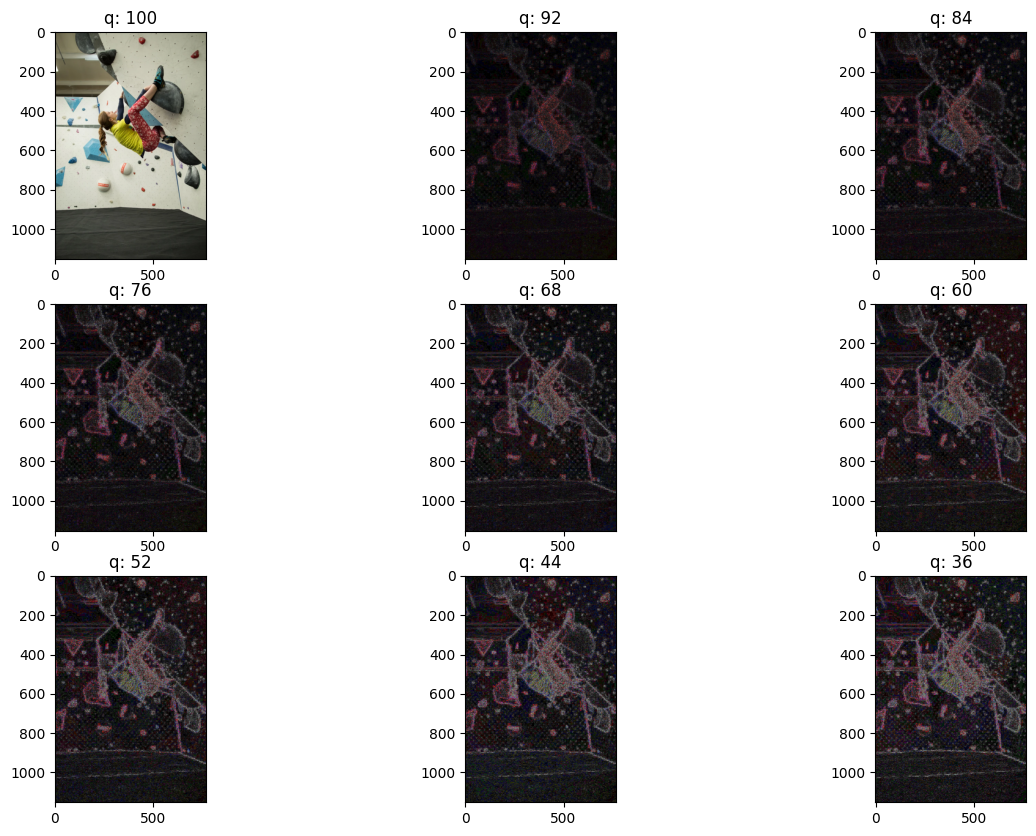

In [23]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGBA')
    image.save(temp_filename, 'RGBA', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')

    items = list(items)

    p = random.choice(items)
    return p.as_posix()

# View random sample from the dataset
p = random_sample(formatted__output_dir+'/heel_hook')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

# Split the Dataset

In [24]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=12)

In [14]:
train_df

,Filepath,Label
4,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
15,/content/drive/MyDrive/ml-climbing-project/for...,toe_hook
23,/content/drive/MyDrive/ml-climbing-project/for...,others
9,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
20,/content/drive/MyDrive/ml-climbing-project/for...,others
8,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
19,/content/drive/MyDrive/ml-climbing-project/for...,toe_hook
0,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
10,/content/drive/MyDrive/ml-climbing-project/for...,toe_hook
28,/content/drive/MyDrive/ml-climbing-project/for...,others


In [15]:
test_df

,Filepath,Label
7,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
22,/content/drive/MyDrive/ml-climbing-project/for...,others
18,/content/drive/MyDrive/ml-climbing-project/for...,toe_hook
14,/content/drive/MyDrive/ml-climbing-project/for...,toe_hook
1,/content/drive/MyDrive/ml-climbing-project/for...,heel_hook
21,/content/drive/MyDrive/ml-climbing-project/for...,others


In [16]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [17]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 20 validated image filenames belonging to 3 classes.
Found 4 validated image filenames belonging to 3 classes.
Found 6 validated image filenames belonging to 3 classes.


In [18]:
print("train_images.n: ", train_images.n)
print("val_images.n: ", val_images.n)
print("test_images.n: ", test_images.n)

print("train_images.batch_size: ", train_images.batch_size)
print("val_images.batch_size: ", val_images.batch_size)
print("test_images.batch_size: ", test_images.batch_size)

print("len(train_images): ", len(train_images))
print("len(val_images): ", len(val_images))
print("len(test_images): ", len(test_images))

train_images.n:  20
val_images.n:  4
test_images.n:  6
train_images.batch_size:  32
val_images.batch_size:  32
test_images.batch_size:  32
len(train_images):  1
len(val_images):  1
len(test_images):  1


In [19]:
print("train_images.class_indices:", train_images.class_indices)
print("val_images.class_indices:", val_images.class_indices)
print("test_images.class_indices:", test_images.class_indices)

train_images.class_indices: {'heel_hook': 0, 'others': 1, 'toe_hook': 2}
val_images.class_indices: {'heel_hook': 0, 'others': 1, 'toe_hook': 2}
test_images.class_indices: {'heel_hook': 0, 'others': 1, 'toe_hook': 2}


# Set up Resize, Rescale and Data Augumentation

In [20]:
# Setup Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224,224),
  tf.keras.layers.Rescaling(1./255),
])

# Setup Data Augmentation
data_augmentation = keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
], name="data_augmentation")

The above data processing steps will be added to the ML pipeline, and Tensorflow will apply the data proccessing in the following way under the hood:

<table>
  <tr>
    <th>Transformation</th>
    <th>Training Data</th>
    <th>Validation Data</th>
    <th>Test Data</th>
  </tr>
  <tr>
    <td>Resizing & Rescaling</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
  </tr>
  <tr>
    <td>Data Augmentation</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
    <td style="background-color: lightgray;">❌ Not Applied</td>
    <td style="background-color: lightgray;">❌ Not Applied</td>
  </tr>
</table>



In the next step, I will train models with increased number of data and compare the performance.